# Caltech Machine Learning Homework # 2

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
import random
import math
import matplotlib.pyplot as plt
from typing import List

Instructions: https://work.caltech.edu/homework/hw2.pdf

Answers: http://work.caltech.edu/homework/hw2_sol.pdf

## Hoeffding Inequality

![](imgs/hoeffding1.png)

In [34]:
N = 1000
M = 10

results = {}

for n in range(N):
    results[f'c{n+1}'] = [random.choice(['H', 'T']) for _ in range(M)] 

print(list(results.items())[:10])

[('c1', ['T', 'H', 'H', 'T', 'H', 'H', 'H', 'T', 'T', 'H']), ('c2', ['H', 'H', 'T', 'H', 'H', 'H', 'H', 'H', 'T', 'T']), ('c3', ['H', 'H', 'T', 'H', 'T', 'H', 'H', 'T', 'T', 'T']), ('c4', ['T', 'H', 'H', 'T', 'T', 'H', 'H', 'H', 'T', 'T']), ('c5', ['H', 'T', 'H', 'H', 'T', 'H', 'T', 'T', 'T', 'H']), ('c6', ['T', 'H', 'T', 'H', 'H', 'T', 'T', 'H', 'H', 'T']), ('c7', ['T', 'T', 'H', 'T', 'H', 'H', 'H', 'T', 'T', 'T']), ('c8', ['T', 'T', 'H', 'T', 'T', 'H', 'T', 'T', 'T', 'T']), ('c9', ['T', 'T', 'H', 'H', 'H', 'H', 'H', 'T', 'T', 'H']), ('c10', ['T', 'H', 'H', 'H', 'T', 'H', 'H', 'T', 'T', 'T'])]


In [35]:
c1 = results['c1']
print(f'c1 is {c1}')
c_rand = results[random.choice(list(results.keys()))]
print(f'c_rand is {c_rand}')

c_min: List = []
minFrequencyOfHeadsCounter = 10
for key,tosses in results.items():
    headsCount = tosses.count('H')
    if (headsCount < minFrequencyOfHeadsCounter): 
        minFrequencyOfHeadsCounter = headsCount
        c_min = tosses
print(f'c_min is {c_min}')
    
v1 = c1.count('H')/10
v_rand = c_rand.count('H')/10
v_min = c_min.count('H')/10
print(f'v1 is {v1}')
print(f'v_rand is {v_rand}')
print(f'v_min is {v_min}')

c1 is ['T', 'H', 'H', 'T', 'H', 'H', 'H', 'T', 'T', 'H']
c_rand is ['T', 'T', 'T', 'H', 'H', 'T', 'T', 'H', 'T', 'T']
c_min is ['T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T']
v1 is 0.6
v_rand is 0.3
v_min is 0.0


Now run the whole thing 100,000 times

In [41]:
O = 100000

v1: List[float] = []
v_rand: List[float] = []
v_min: List[float] = []

for o in range(O):
    print(o) if (o % 1000 == 0) else _
    
    results = {}
    for n in range(N):
        results[f'c{n+1}'] = [random.choice(['H', 'T']) for _ in range(M)] 
        
    c1 = results['c1']
    c_rand = results[random.choice(list(results.keys()))]

    c_min: List = []
    minFrequencyOfHeadsCounter = 10
    for key,tosses in results.items():
        headsCount = tosses.count('H')
        if (headsCount < minFrequencyOfHeadsCounter): 
            minFrequencyOfHeadsCounter = headsCount
            c_min = tosses

    v1.append(c1.count('H')/10)
    v_rand.append(c_rand.count('H')/10)
    v_min.append(c_min.count('H')/10)
    
print(f'Average value for v1 is {sum(v1)/len(v1)}')
print(f'Average value for v_rand is {sum(v_rand)/len(v_rand)}')
print(f'Average value for v_min is {sum(v_min)/len(v_min)}')

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
Average value for v1 is 0.4993849999999978
Average value for v_rand is 0.5002580000000052
Average value for v_min is 0.03743899999997691


### 1. The average value of νmin is closest to:

[a] 0

[b] 0.01

[c] 0.1

[d] 0.5

[e] 0.67

 <font color='green'>b</font>

### 2. Which coin(s) has a distribution of ν that satisfies the (single-bin) Hoeffding Inequality?

[a] c1 only

[b] crand only

[c] cmin only

[d] c1 and crand

[e] cmin and crand

Let's generate the distributions again using numpy...

In [14]:
v1_s = []
v_rand_s = []
v_min_s = []

for i in range(100000):
    # 1 for heads, 0 for tails
    coins = np.random.randint(0, 1+1, [1000, 10])
    c1 = coins[0,:]
    c_rand = coins[np.random.randint(0, 1000),:]
    c_min = coins[np.argmin(np.sum(coins, axis=1)),:]

    v1_s.append(np.mean(c1))
    v_rand_s.append(np.mean(c_rand))
    v_min_s.append(np.mean(c_min))

Plot that

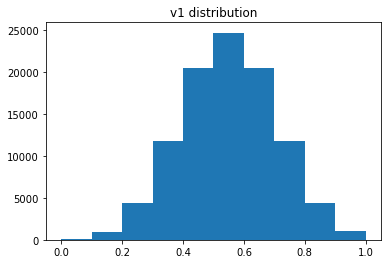

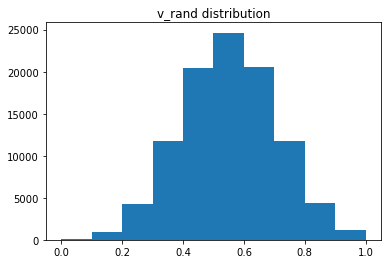

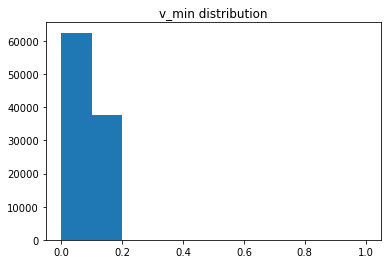

In [15]:
plt.hist(v1_s, bins=np.linspace(0, 10, 11)/10)
plt.title("v1 distribution")
plt.show()

plt.hist(v_rand_s, bins=np.linspace(0, 10, 11)/10)
plt.title("v_rand distribution")
plt.show()

plt.hist(v_min_s, bins=np.linspace(0, 10, 11)/10)
plt.title("v_min distribution")
plt.show()

For c1....

The requirement for Hoeffding's inequality to apply is that the underlying probability distribution must be binomial, hence the anser is

 <font color='green'>d</font>

## Error and Noise

![](imgs/error1.png)

[a] µ

[b] λ

[c] 1-µ

[d] (1 − λ) ∗ µ + λ ∗ (1 − µ)

[e] (1 − λ) ∗ (1 − µ) + λ ∗ µ

I stared at this for 30mins and couldn't figure it out, but this person did!

https://github.com/homefish/edX_Learning_From_Data_2017/blob/master/homework_2/homework_2_problem_3_4_Error_and_Noise.ipynb

![](imgs/error1_solution.png)

### 4. At what value of λ will the performance of h be independent of µ?

[a] 0

[b] 0.5

[c] 1/√2

[d] 1

[e] No values of λ

Guessing `1` because it cancels the noise entirely, but let's see with some expansion...

```
"Performance of h" = P(error) = λ * µ + (1 - λ) * (1 - µ)
    = λ * µ + 1 - µ - λ + λ * µ
    = 2 * λ * µ - µ - λ + 1
    = µ * ( 2 * λ - 1) - λ + 1
```

This cancels out `µ at λ = 0.5` so the correct answer should be

 <font color='green'>b</font>

## Linear Regression

![](imgs/linreg5.png)

In [6]:
def set_axis_cartesian():
    ax = plt.figure().add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])

Random Point 1: [-0.63449134 -0.91330155]
Random Point 2: [ 0.68327528 -0.03733402]
0.6647364689458757
-0.491532014452163


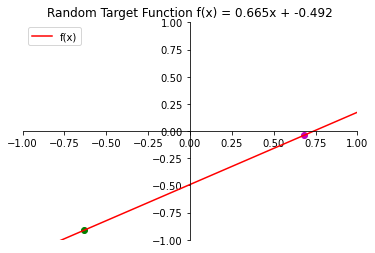

In [7]:
p1 = np.random.uniform(-1, 1, size=2)
p2 = np.random.uniform(-1, 1, size=2)

print('Random Point 1:', p1)
print('Random Point 2:', p2)

set_axis_cartesian()

plt.plot(p1[0], p1[1], 'go')
plt.plot(p2[0], p2[1], 'mo')

m = (p1[1] - p2[1]) / (p1[0] - p2[0])
print(m)

c = p1[1] - m*p1[0]
print(c)

x_axis = np.linspace(-1,1, 100)
y_axis = m*(x_axis)+c
plt.plot(x_axis, y_axis, 'r', label='f(x)')

plt.title(f'Random Target Function f(x) = {m:.3f}x + {c:.3f}')
plt.legend(loc='upper left')

plt.show()

In [8]:
N = 100
x = np.random.uniform(-1, 1, size=(N,2))
x.shape

(100, 2)

With `a` and `b` the polynomial coefficients, the side of the line that a point "lands" on is given by

```
sign(ax+by-d)
```

![Illustration](https://i.stack.imgur.com/5H6z3.png)

...where we take being on the line exactly as 0, which will always be misclassified.

```
y = mx + c
mx - y = -c

so to put it in the form ax + by = d
```




In [12]:
a = m
b = -1
d = -c
def y_func(x:np.ndarray):
    assert x.shape == (2,)
    return np.sign(a*x[0]+b*x[1]-d).astype(int)

y = np.apply_along_axis(y_func, 1, x)

(100,)

In [14]:
model = LinearRegression().fit(x, y)
model.score(x, y)

0.605635503823847

In [34]:
eIn = np.bincount(np.sign(model.predict(x)).astype(int) == y)[0] / len(x)
eIn

0.01

We now run the experiment 1000 times and keep track of the g's:

In [38]:
M = 1000

gs = []
eIns = []

for _ in range(M):
    p1 = np.random.uniform(-1, 1, size=2)
    p2 = np.random.uniform(-1, 1, size=2)
    m = (p1[1] - p2[1]) / (p1[0] - p2[0])
    c = p1[1] - m*p1[0]
    x = np.random.uniform(-1, 1, size=(N,2))
    a = m
    b = -1
    d = -c
    
    def y_func(x:np.ndarray):
        assert x.shape == (2,)
        return np.sign(a*x[0]+b*x[1]-d).astype(int)
    y = np.apply_along_axis(y_func, 1, x)
    
    model = LinearRegression().fit(x, y)
    gs.append(model)
    
    eIn = np.bincount(np.sign(model.predict(x)).astype(int) == y)[0] / len(x)
    eIns.append(eIn)
    
sum(eIns) / M
    
    

0.03890000000000007

### 6. Now, generate 1000 fresh points and use them to estimate the out-of-sample
error Eout of g that you got in Problem 5 (number of misclassified out-of-sample
points / total number of out-of-sample points). Again, run the experiment 1000
times and take the average. Which value is closest to the average Eout?

[a] 0

[b] 0.001

[c] 0.01

[d] 0.1

[e] 0.5

In [40]:
M = 1000
eOuts = []

for _ in range(M):
    p1 = np.random.uniform(-1, 1, size=2)
    p2 = np.random.uniform(-1, 1, size=2)
    m = (p1[1] - p2[1]) / (p1[0] - p2[0])
    c = p1[1] - m*p1[0]
    x = np.random.uniform(-1, 1, size=(N,2))
    a = m
    b = -1
    d = -c
    
    def y_func(x:np.ndarray):
        assert x.shape == (2,)
        return np.sign(a*x[0]+b*x[1]-d).astype(int)
    y = np.apply_along_axis(y_func, 1, x)
    
    model = LinearRegression().fit(x, y)
    
    nFreshPoints = 1000
    xFresh = np.random.uniform(-1, 1, size=(nFreshPoints, 2))
    yFresh = np.apply_along_axis(y_func, 1, xFresh)
    
    eOut = np.bincount(np.sign(model.predict(xFresh)).astype(int) == yFresh)[0] / len(xFresh)
    eOuts.append(eOut)
    
sum(eOuts) / M
    

0.04891599999999996

![](imgs/linreg7.png)

Let's use the "dagger" formula (pseudo-inverse) from the course this time!

In [48]:
N = 10
M = 1000

numIterationsList = []

for _ in range(M):
    p1 = np.random.uniform(-1, 1, size=2)
    p2 = np.random.uniform(-1, 1, size=2)
    m = (p1[1] - p2[1]) / (p1[0] - p2[0])
    c = p1[1] - m*p1[0]
    
    # Writing the line as ax+by = d, the side of the line that a point lands on is given by sign(ax+by-d) (see diagram above)
    # So we need the "target function weights" to be 1*c+mx-y
    weightsForF = np.array([c, m, -1])
    X = np.random.uniform(-1, 1, size=(N,2))
    XWithBias = np.insert(x, 0, 1, axis=1)
    Y = np.sign(np.dot(XWithBias, weightsForF))
    
    XDagger = np.dot(np.linalg.inv(np.dot(XWithBias.T, XWithBias)), XWithBias.T)
    weightsFromLinearRegression = np.dot(XDagger, Y)


    def g(point: np.ndarray, weights: np.ndarray) -> int:
        assert point.shape == (3,)
        assert weights.shape == (3,)
        return np.sign( np.dot( np.transpose(weights), point ) ).astype(int)
    def converges():
        for i,point in enumerate(XWithBias):
            assert point.shape == (3,)
            if g(point, weightsFromLinearRegression) != Y[i]:
                return False
        numIterationsList.append(counter)
        
    counter = 0
    while not converges():
        counter += 1
        correctNs = []
        wrongNs = []
        
        # Split points into correctly and incorrectly classified
        for n,point in enumerate(xWithBias):
            if g(point,weightsFromLinearRegression) == y[n]:
                correctNs.append(n)
            else:
                wrongNs.append(n)

        # Pick an incorrectly classified point at random
        if len(wrongNs) == 0: break
        updateN = random.choice(wrongNs)

        # Update its weight vector
        for n,weight in enumerate(weightsFromLinearRegression):
            weightsFromLinearRegression[n] = weightsFromLinearRegression[n] + y[updateN] * xWithBias[updateN][n]
            
print(f'Average runs until conversion for N={N} after {M} runs: {sum(numIterationsList)/M}')
    

Average runs until conversion for N=10 after 1000 runs: 1.106


![](imgs/nonlin.png)

In [37]:
N = 1000

X = np.random.uniform(-1, 1, size=(N,2))
print(f'first 10 X:\n {X[:10]}')

first 10 X:
 [[ 0.11685552 -0.36001318]
 [-0.07361115 -0.11172873]
 [-0.51979655  0.39336959]
 [ 0.19358721 -0.4723319 ]
 [-0.28906105 -0.5414725 ]
 [ 0.51640034 -0.33860619]
 [-0.87571113 -0.07714285]
 [-0.44806933 -0.08505412]
 [ 0.79561502  0.26258231]
 [ 0.52455105  0.41543431]]


### 8. Carry out Linear Regression without transformation, i.e., with feature vector:


`(1, x1, x2)`

to find the weight `w`.

What is the closest value to the classification in-sample
error `Ein`? 

(Run the experiment 1000 times and take the average `Ein` to reduce
variation in your results.)

[a] 0

[b] 0.1

[c] 0.3

[d] 0.5

[e] 0.8

In [4]:
def f(x:np.ndarray):
    assert x.shape == (2,)
    return np.sign(x[0]**2+x[1]**2-0.6).astype(int)
Y = np.apply_along_axis(f, 1, X)
print(f'First 10 Y: \n {Y[:10]}')

# Simulate noise by flipping sign in random 10% of Y
noisyIdxs = np.random.choice(N, int(N/10), replace=False)
for i in noisyIdxs:
    Y[i] = np.negative(Y[i])
print(f'\nFirst 10 Y after applying some noise: \n {Y[:10]}')

XWithBias = np.insert(X, 0, 1, axis=1)
print(XWithBias.shape)

# Let's apply linear regression
XDagger = np.dot(np.linalg.inv(np.dot(XWithBias.T, XWithBias)), XWithBias.T)
weightsFromLinearRegression = np.dot(XDagger, Y)
print(weightsFromLinearRegression.shape)

# Make predictions from our linear regression weights
YPred = np.sign(np.dot(XWithBias, weightsFromLinearRegression))

# And check how many we errorz
eIn = sum(YPred != Y) / N
print(f'\nEstimated eIn is: {eIn}')


First 10 Y: 
 [ 1  1 -1 -1  1 -1 -1 -1 -1 -1]

First 10 Y after applying some noise: 
 [ 1  1 -1 -1  1 -1 -1 -1 -1 -1]
(1000, 3)
(3,)

Estimated eIn is: 0.563


Let's run the whole experiment 1000 times:

In [69]:
M = 1000

eIns = []

for _ in range(M):
    X = np.random.uniform(-1, 1, size=(N,2))
    def f(x:np.ndarray):
        assert x.shape == (2,)
        return np.sign(x[0]**2+x[1]**2-0.6).astype(int)
    Y = np.apply_along_axis(f, 1, X)

    # Simulate noise by flipping sign in random 10% of Y
    noisyIdxs = np.random.choice(N, int(N/10), replace=False)
    for i in noisyIdxs:
        Y[i] = np.negative(Y[i])

    XWithBias = np.insert(X, 0, 1, axis=1)

    # Let's apply linear regression
    XDagger = np.dot(np.linalg.inv(np.dot(XWithBias.T, XWithBias)), XWithBias.T)
    weightsFromLinearRegression = np.dot(XDagger, Y)

    # Make predictions from our linear regression weights
    YPred = np.sign(np.dot(XWithBias, weightsFromLinearRegression))

    # And check how many we errorz
    eIn = sum(YPred != Y) / N
    eIns.append(eIn)
    
print(f'\nEstimated eIn avg after {M} runs is: {sum(eIns)/M}')


Estimated eIn avg after 1000 runs is: 0.5046549999999997


No good!

Just for target practice, let's do the same again using `LinearRegression` from `sklearn` and see if the results are similar to our "XDagger" formula: 

In [77]:
M = 1000

eIns = []

for _ in range(M):
    X = np.random.uniform(-1, 1, size=(N,2))
    def f(x:np.ndarray):
        assert x.shape == (2,)
        return np.sign(x[0]**2+x[1]**2-0.6).astype(int)
    Y = np.apply_along_axis(f, 1, X)

    # Simulate noise by flipping sign in random 10% of Y
    noisyIdxs = np.random.choice(N, int(N/10), replace=False)
    for i in noisyIdxs:
        Y[i] = np.negative(Y[i])

    XWithBias = np.insert(X, 0, 1, axis=1)

    # Let's apply linear regression
    model = LinearRegression().fit(XWithBias, Y)

    # Make predictions from our linear regression weights
    YPred = np.sign(model.predict(XWithBias))

    # And check how many we errorz
    eIn = sum(YPred != Y) / N
    eIns.append(eIn)
    
print(f'\nEstimated eIn avg after {M} runs is: {sum(eIns)/M}')


Estimated eIn avg after 1000 runs is: 0.5050800000000009


![](imgs/nonlintrans9.png)

In [21]:
N = 1000
M = 1000

# List of eIn from M runs for each given hypothesis a-e
eInsA = []
eInsB = []
eInsC = []
eInsD = []
eInsE = []

for _ in range(M):
    X = np.random.uniform(-1, 1, size=(N,2))
    x1s = X[:,0]
    x2s = X[:,1]
    # Outputs remain the same
    Y = np.apply_along_axis(f, 1, X)

    # Transform X into feature vector (1, x1, x2, x1x2, x1**2, x2**2)
    X = np.array([ np.ones(N), x1s, x2s, x1s*x2s, x1s**2, x2s**2 ]).T

    # Use linear regression to find weights
    XDagger = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T)
    linRegWeights = np.dot(XDagger, Y)
    YLinReg = np.sign(np.dot(X, linRegWeights))
    
    # Check which given hypothesis gA..gE has the lowest in sample error eIn
    # over all the points, compared with our linear regression
    weightsA = np.array([-1, -0.05, 0.08, 0.13, 1.5, 1.5])
    yA = np.sign(np.dot(X, weightsA))
    eInA = sum(yA != YLinReg) / N
    eInsA.append(eInA)
    
    weightsB = np.array([-1, -0.05, 0.08, 0.13, 1.5, 15])
    yB = np.sign(np.dot(X, weightsB))
    eInB = sum(yB != YLinReg) / N
    eInsB.append(eInB)
        
    weightsC = np.array([-1, -0.05, 0.08, 0.13, 15, 1.5])
    yC = np.sign(np.dot(X, weightsC))
    eInC = sum(yC != YLinReg) / N
    eInsC.append(eInC)
        
    weightsD = np.array([-1, -1.5, 0.08, 0.13, 0.05, 0.05])
    yD = np.sign(np.dot(X, weightsD))
    eInD = sum(yD != YLinReg) / N
    eInsD.append(eInD)
        
    weightsE = np.array([-1, -0.05, 0.08, 1.5, 0.15, 0.15])
    yE = np.sign(np.dot(X, weightsE))
    eInE = sum(yE != YLinReg) / N
    eInsE.append(eInE)
    
print(f'eIn for a is {sum(eInsA)/M}\n')
print(f'eIn for b is {sum(eInsB)/M}\n')
print(f'eIn for c is {sum(eInsC)/M}\n')
print(f'eIn for d is {sum(eInsD)/M}\n')
print(f'eIn for e is {sum(eInsE)/M}\n')
    



eIn for a is 0.033615999999999986

eIn for b is 0.33571399999999996

eIn for c is 0.3368910000000001

eIn for d is 0.36832500000000057

eIn for e is 0.4396400000000001



So (a) looks closest :)

![](imgs/nonlintrans10.png)

In [5]:
N = 1000
M = 1000

eOuts = []

for _ in range(M):
    # Generate new set of N points
    X = np.random.uniform(-1, 1, size=(N,2))
    x1s = X[:,0]
    x2s = X[:,1]
   
    
    def f(x:np.ndarray):
        assert x.shape == (2,)
        return np.sign(x[0]**2+x[1]**2-0.6).astype(int)
    Y = np.apply_along_axis(f, 1, X)
      
    # Simulate noise by flipping sign in random 10% of Y
    noisyIdxs = np.random.choice(N, int(N/10), replace=False)
    for i in noisyIdxs:
        Y[i] = np.negative(Y[i])
    
    # We picked hypothesis (a) so let's use that to predict:
    X = np.array([ np.ones(N), x1s, x2s, x1s*x2s, x1s**2, x2s**2 ]).T
    weights = np.array([-1, -0.05, 0.08, 0.13, 1.5, 1.5])
    YPred = np.sign(np.dot(X, weights))
   
        
    # Estimate eOut
    eOut = sum(YPred != Y) / N
    eOuts.append(eOut)
    
print(f'Estimated eOut over {M} runs: {sum(eOuts) / M}')
    

Estimated eOut over 1000 runs: 0.14269500000000027


As expected, the eOut is much higher since there was 10% noise in the original training data.